In [11]:
# Activity Remove any average measurements from the datasets such as OECD average (OAVG) or EU averages.


import pandas as pd

df_tax_on_property = pd.read_csv("datasets/oecd_tax_on_property.csv")
df_unemployment = pd.read_csv("datasets/oecd_unemployment.csv")
df_corporate_profit = pd.read_csv("datasets/oecd_corporate_profit.csv")
df_tax_income = pd.read_csv("datasets/oecd_tax_income.csv")


def remove_averages(df):
    return df[~df['LOCATION'].str.contains('OAVG|EU', regex=True, na=False)]

# apply function to datasets
df_tax_on_property = remove_averages(df_tax_on_property)
df_unemployment = remove_averages(df_unemployment)
df_corporate_profit = remove_averages(df_corporate_profit)
df_tax_income = remove_averages(df_tax_income)

df_tax_on_property.to_csv("datasets/oecd_tax_on_property.csv", index=False)
df_unemployment.to_csv("datasets/oecd_unemployment.csv", index=False)
df_corporate_profit.to_csv("datasets/oecd_corporate_profit.csv", index=False)
df_tax_income.to_csv("datasets/oecd_tax_income.csv", index=False)



In [12]:
# Activity  Drop the column ‘FLAG CODES‘ from all the datasets.

def drop_flag_codes(df):
    if 'Flag Codes' in df.columns:
        return df.drop('Flag Codes', axis=1)
    return df

df_tax_on_property = pd.read_csv("datasets/oecd_tax_on_property.csv")
df_unemployment = pd.read_csv("datasets/oecd_unemployment.csv")
df_corporate_profit = pd.read_csv("datasets/oecd_corporate_profit.csv")
df_tax_income = pd.read_csv("datasets/oecd_tax_income.csv")

# apply function to datasets
df_tax_on_property = drop_flag_codes(df_tax_on_property)
df_unemployment = drop_flag_codes(df_unemployment)
df_corporate_profit = drop_flag_codes(df_corporate_profit)
df_tax_income = drop_flag_codes(df_tax_income)

df_tax_on_property.to_csv("datasets/oecd_tax_on_property.csv", index=False)
df_unemployment.to_csv("datasets/oecd_unemployment.csv", index=False)
df_corporate_profit.to_csv("datasets/oecd_corporate_profit.csv", index=False)
df_tax_income.to_csv("datasets/oecd_tax_income.csv", index=False)


In [13]:
!pip install pycountry

In [14]:
# Activity  Plot for few selected countries (5) the tax on personal income across the years.

import pandas as pd
import matplotlib.pyplot as plt
import pycountry

def get_country_name(code):
    country = pycountry.countries.get(alpha_3=code)
    return country.name if country else None


df_tax_income = pd.read_csv("datasets/oecd_tax_income.csv")

# convert country codes in the LOCATION column to country names
df_tax_income['Country'] = df_tax_income['LOCATION'].apply(get_country_name)

# define 5 countries to plot
five_countries = ['Spain', 'France', 'Italy', 'Germany', 'Greece']

# filter for selected countries
df_selected = df_tax_income[df_tax_income['Country'].isin(five_countries)]


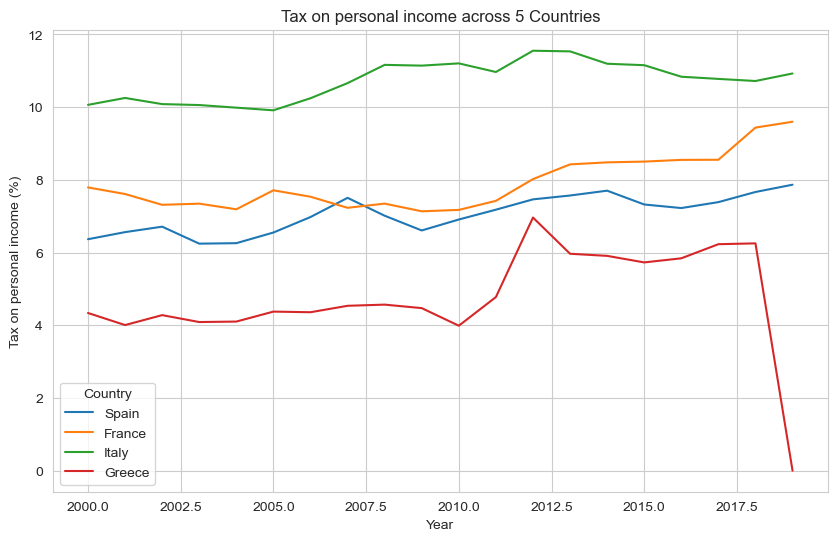

In [15]:
plt.figure(figsize=(10, 6))
for country in five_countries:
    country_data = df_selected[df_selected['Country'] == country]
    if not country_data.empty:  # Check if data exists for the country
        plt.plot(country_data['TIME'], country_data['Value'], label=country)

plt.title('Tax on personal income across 5 Countries')
plt.xlabel('Year')
plt.ylabel('Tax on personal income (%)')
plt.legend(title='Country')
plt.grid(True)
plt.show()


In [16]:
!pip install matplotlib seaborn pandas


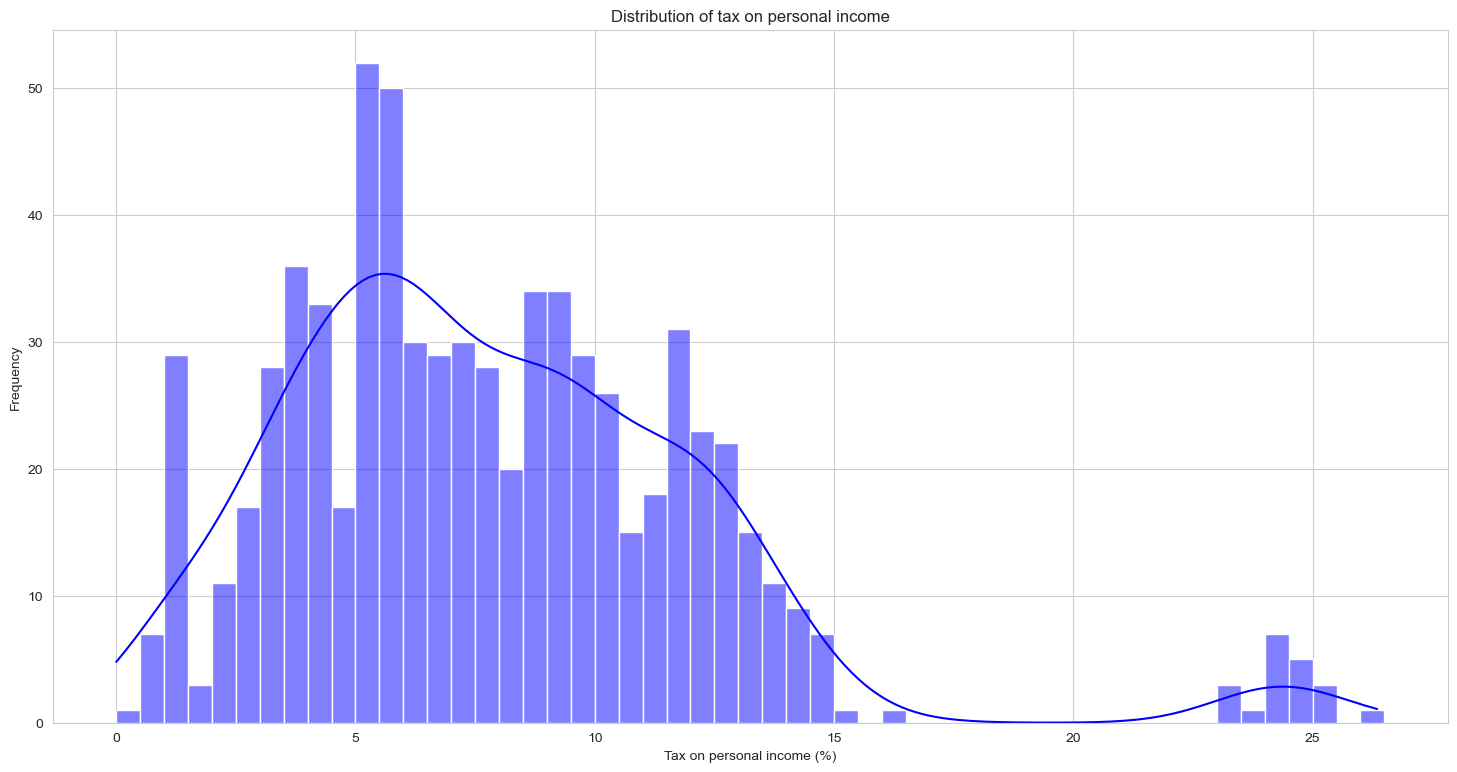

In [17]:
# Activity  Plot the distributions of the tax on personal income for the full dataset.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_tax_income = pd.read_csv("datasets/oecd_tax_income.csv")


plt.figure(figsize=(18, 9))
sns.histplot(df_tax_income['Value'], kde=True, color='blue', binwidth=0.5)  # binwidth adjusted for granularity

plt.title('Distribution of tax on personal income')
plt.xlabel('Tax on personal income (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [18]:
!pip install pycountry-convert pycountry


In [19]:
# Activity  Plot the same distributions per continent (Europe, Asia, America).

import pandas as pd
import pycountry
import pycountry_convert as pc

# Function to map alpha-3 country codes to continents
def map_continent(country_code):
    try:
       
        alpha_2 = pycountry.countries.get(alpha_3=country_code).alpha_2
        
        continent_code = pc.country_alpha2_to_continent_code(alpha_2)
        
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        
        # Consolidate 'North America' and 'South America' into 'America'
        if continent_name in ['North America', 'South America']:
            return 'America'
        elif continent_name == 'Europe' or continent_name == 'Asia':
            return continent_name
        return None
    except:
        return None

# Load data
df_tax_income = pd.read_csv("datasets/oecd_tax_income.csv")

# Create 'Continent' column
df_tax_income['Continent'] = df_tax_income['LOCATION'].apply(map_continent)

# Filter out rows where Continent is None
df_tax_income = df_tax_income[df_tax_income['Continent'].notna()]

# Save the updated DataFrame back to CSV
df_tax_income.to_csv("datasets/oecd_tax_income.csv", index=False)




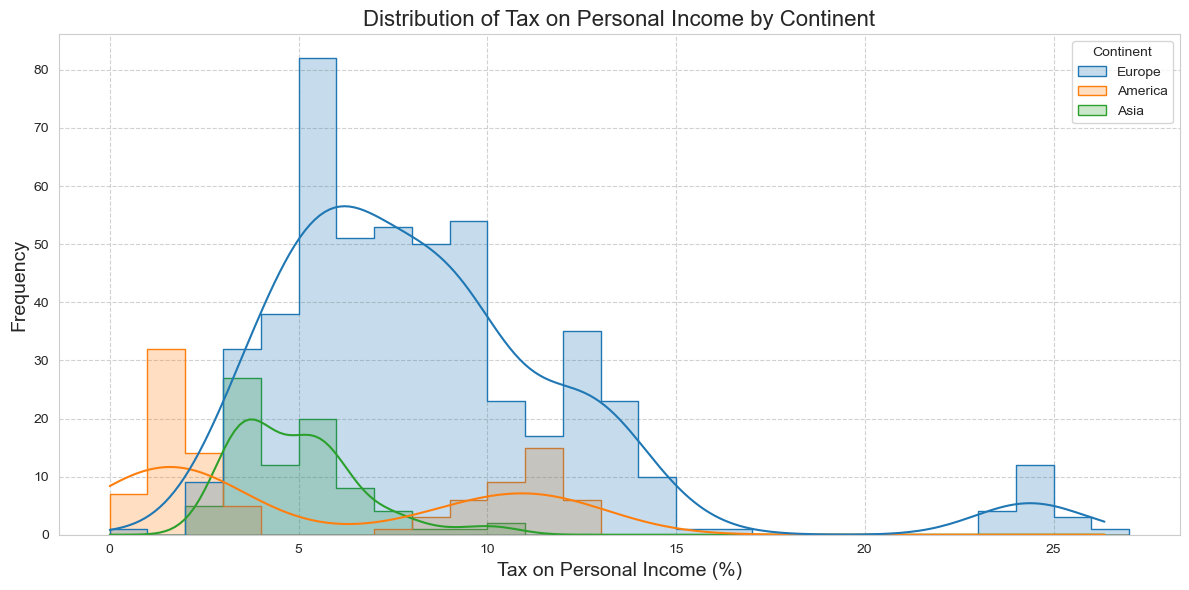

In [20]:
#  Plot

import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
plot = sns.histplot(
    data=df_tax_income,
    x='Value',  
    hue='Continent',  
    element='step',
    kde=True,
    palette='tab10',  
    binwidth=1
)

plt.title('Distribution of Tax on Personal Income by Continent', fontsize=16)
plt.xlabel('Tax on Personal Income (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.9)

# Force the legend to explicitly show the continent names
legend_labels = 'Continent'  
handles, _ = plot.get_legend_handles_labels()


plt.tight_layout()
plt.show()


In [21]:
# Activity  Find the average and median tax on corporate profits per country.

import pandas as pd


df_corporate_profit = pd.read_csv("datasets/oecd_corporate_profit.csv")

# Group by LOCATION and calculate average and median tax values
tax_stats = df_corporate_profit.groupby('LOCATION')['Value'].agg(
    Average='mean',
    Median='median'
).reset_index()


print(tax_stats.head())

# save results to CSV file
tax_stats.to_csv("datasets/corporate_profit_per_country.csv", index=False)


  LOCATION   Average  Median
0      AUS  5.166895  4.9740
1      AUT  2.221950  2.1465
2      BEL  3.206900  3.1345
3      CAN  3.445800  3.3745
4      CHE  2.740250  2.7690


In [22]:
# Activity  Calculate the unemployment rate per country per year.

import pandas as pd


df_unemployment = pd.read_csv("datasets/oecd_unemployment.csv")

# Extract the year from the TIME column
df_unemployment['Year'] = df_unemployment['TIME'].str[:4]

# Group by 'LOCATION' and 'Year', and calculate the average unemployment rate
unemployment_rate = df_unemployment.groupby(['LOCATION', 'Year'])['Value'].mean().reset_index()

# Rename the 'Value' column to 'Unemployment Rate'
unemployment_rate.rename(columns={'Value': 'Unemployment Rate'}, inplace=True)


# Save the results to a CSV file
unemployment_rate.to_csv("datasets/unemployment_rate_per_country_per_year.csv", index=False)


In [23]:
# Activity  Calculate the unemployment rate per Continent per year

import pandas as pd
import pycountry_convert as pc
import pycountry

# Function to map country codes to continents
def map_continent(country_code):
    try:
       
        alpha_2 = pycountry.countries.get(alpha_3=country_code).alpha_2
        
        continent_code = pc.country_alpha2_to_continent_code(alpha_2)
        
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        
        # Merge North America and South America into 'America'
        if continent_name in ['North America', 'South America']:
            return 'America'
        return continent_name
    except:
        return 'Unknown'


df_unemployment = pd.read_csv("datasets/oecd_unemployment.csv")

# Add a Continent column
df_unemployment['Continent'] = df_unemployment['LOCATION'].apply(map_continent)

# Extract the year from the TIME column
df_unemployment['Year'] = df_unemployment['TIME'].str[:4]

# Group by Continent and Year, and calculate the average unemployment rate
unemployment_rate_continent = df_unemployment.groupby(['Continent', 'Year'])['Value'].mean().reset_index()

# Rename the 'Value' column to 'Unemployment Rate'
unemployment_rate_continent.rename(columns={'Value': 'Unemployment Rate'}, inplace=True)

# Filter out rows with 'Unknown' as the continent
unemployment_rate_continent = unemployment_rate_continent[unemployment_rate_continent['Continent'] != 'Unknown']


# Save the results to a CSV file
unemployment_rate_continent.to_csv("datasets/unemployment_rate_per_continent_per_year.csv", index=False)



In [24]:
# Activity Rank the countries in decreasing order of the average unemployment rate for the years 2011-2015.

import pandas as pd

df_unemployment = pd.read_csv("datasets/oecd_unemployment.csv")

# Extract the year from the TIME column
df_unemployment['Year'] = df_unemployment['TIME'].str[:4].astype(int)

# Filter data for the years 2011 to 2015
df_filtered = df_unemployment[(df_unemployment['Year'] >= 2011) & (df_unemployment['Year'] <= 2015)]

# Group by LOCATION and calculate the average unemployment rate
avg_unemployment_rate = df_filtered.groupby('LOCATION')['Value'].mean().reset_index()

# Rename the 'Value' column to 'Average Unemployment Rate'
avg_unemployment_rate.rename(columns={'Value': 'Average Unemployment Rate'}, inplace=True)

# Rank countries in decreasing order of the average unemployment rate
ranked_countries = avg_unemployment_rate.sort_values(by='Average Unemployment Rate', ascending=False)


ranked_countries.to_csv("datasets/countries_unemployment_2011_to_2015.csv", index=False)


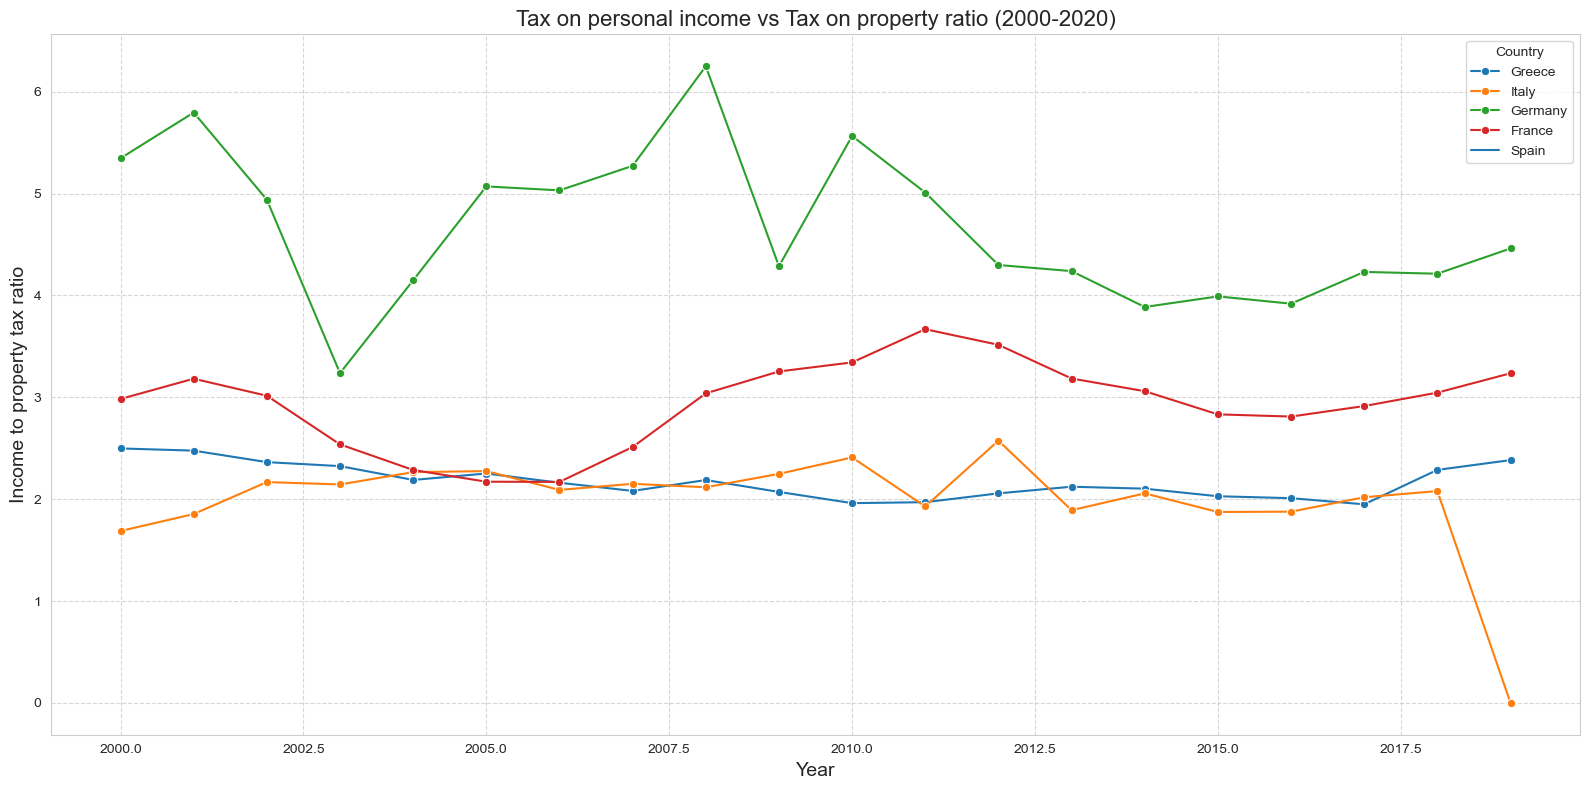

In [25]:
# Activity  Calculate the ratio of the tax on personal income versus the tax on property for each country. 
# Then plot across the years for few selected countries(Greece Italy Germany France Spain)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_tax_income = pd.read_csv("datasets/oecd_tax_income.csv")
df_tax_property = pd.read_csv("datasets/oecd_tax_on_property.csv")

# Merge the datasets on 'LOCATION' and 'TIME'
df_merged = pd.merge(df_tax_income, df_tax_property, on=['LOCATION', 'TIME'], suffixes=('_income', '_property'))

# Calculate the ratio of tax on personal income to tax on property
df_merged['Income_to_Property_Ratio'] = df_merged['Value_income'] / df_merged['Value_property']

# Filter for specific countries (Greece, Italy, Germany, France, Spain)
selected_countries = ['GRC', 'ITA', 'DEU', 'FRA', 'ESP']
df_filtered = df_merged[df_merged['LOCATION'].isin(selected_countries)]

# The plot
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_filtered, x='TIME', y='Income_to_Property_Ratio', hue='LOCATION', marker='o')

# Add titles and labels
plt.title('Tax on personal income vs Tax on property ratio (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Income to property tax ratio', fontsize=14)
plt.legend(title='Country', labels=['Greece', 'Italy', 'Germany', 'France', 'Spain'])
plt.grid(True, linestyle='--', alpha=0.8)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()
